# Decision Tree

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

wayakit_df = pd.read_csv('wayakit_products4.csv', encoding='latin-1')
print(f"Dataset Wayakit cargado: {wayakit_df.shape[0]} filas, {wayakit_df.shape[1]} columnas")

competition_df = pd.read_csv('final_results.csv', encoding='latin-1')
print(f"Dataset Competencia cargado: {competition_df.shape[0]} filas, {competition_df.shape[1]} columnas")

print("\n=== INFORMACIÓN BÁSICA DE LOS DATASETS ===")

print("\nColumnas Wayakit:")
print(wayakit_df.columns.tolist())

print("\nColumnas Competencia:")
print(competition_df.columns.tolist())

print("\n=== TIPOS DE DATOS ===")

print("\nWayakit - Tipos de datos:")
print(wayakit_df.dtypes)

print("\nCompetencia - Tipos de datos:")
print(competition_df.dtypes)

print("\n=== PRIMERAS FILAS ===")

print("\nWayakit - Primeras 5 filas:")
print(wayakit_df.head())

print("\nCompetencia - Primeras 5 filas:")
print(competition_df.head())

print("\n=== DATOS FALTANTES ===")

print("\nWayakit - Datos faltantes:")
print(wayakit_df.isnull().sum())

print("\nCompetencia - Datos faltantes:")
print(competition_df.isnull().sum())

print("\n=== ESTADÍSTICAS BÁSICAS ===")

print("\nWayakit - Información del dataset:")
print(wayakit_df.info())

print("\nCompetencia - Información del dataset:")
print(competition_df.info())

print("\n=== VALORES ÚNICOS EN COLUMNAS CLAVE ===")

print("\nWayakit - Valores únicos por columna:")
for col in wayakit_df.columns:
    print(f"{col}: {wayakit_df[col].nunique()} valores únicos")

print("\nCompetencia - Valores únicos por columna:")
for col in competition_df.columns:
    print(f"{col}: {competition_df[col].nunique()} valores únicos")

Dataset Wayakit cargado: 2248 filas, 67 columnas
Dataset Competencia cargado: 2105 filas, 24 columnas

=== INFORMACIÓN BÁSICA DE LOS DATASETS ===

Columnas Wayakit:
['External ID', 'Product_ID', 'Product_Name', 'Label_Product_Name', 'Status', 'Master product', 'Uploaded in Odoo', 'Notes', 'Formula code', 'MOQ', 'Order unit', 'Presentation', 'Scent', 'Type', 'Link to product mockup', 'Volume_Liters', 'Pack_quantity_Units', 'Type_of_product', 'Category', 'Generic product type', 'SubIndustry', 'Industry', 'Description', ' Dilution rate ', ' Bottle ', ' Label ', 'Liquid', ' Microfibers ', ' Plastic bag ', ' Labor ', ' Shipping ', ' Other costs ', ' Unit_cost_SAR ', ' Base price without VAT ', ' Extra price without VAT ', ' Variant price without VAT ', ' Variant price with VAT ', 'Target_Margin_%', 'Sustainability_Score', 'Label info in CSV form? (Yes or Empty)', 'Label ready in Canva? (Yes or Empty)', 'Concatenate1', 'Concatenate2', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46

In [ ]:
# Función para limpiar nombres de columnas
def clean_columns(df):
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(' ', '_')
        .str.replace('[^a-z0-9_]', '', regex=True)
    )
    return df

# Limpiar nombres de columnas
wayakit_df = clean_columns(wayakit_df)
competition_df = clean_columns(competition_df)

#agregar y cambiar cosas del scraper 
competition_df.rename(columns={'subindustry': 'sub_industry'}, inplace=True)
competition_df.rename(columns={'price_sar': 'price_per_unit_sar'}, inplace=True)
competition_df['channel'] = 'B2C'
###

# Verificar qué columnas están disponibles
print("Columnas disponibles en wayakit:")
print(wayakit_df.columns.tolist())
print("\nColumnas disponibles en competencia:")
print(competition_df.columns.tolist())

# COLUMNAS NECESARIAS PARA WAYAKIT (ajustar según lo que esté disponible)
columnas_wayakit = [
    'product_id',
    'product_name', 
    'type_of_product',
    'generic_product_type',
    'subindustry',
    'industry',
    'volume_liters',
    'pack_quantity_units',
    'unit_cost_sar'
]

# COLUMNAS NECESARIAS PARA COMPETENCIA
columnas_competencia = [
    'type_of_product', 
    'generic_product_type', 
    'sub_industry',
    'industry',
    'price_per_unit_sar',
    'total_quantity',
    'unit_of_measurement_mlgunits',
    'channel'
]

# Filtrar solo las columnas que existen
columnas_wayakit_existentes = [col for col in columnas_wayakit if col in wayakit_df.columns]
columnas_competencia_existentes = [col for col in columnas_competencia if col in competition_df.columns]

print(f"\nColumnas wayakit que existen: {columnas_wayakit_existentes}")
print(f"Columnas competencia que existen: {columnas_competencia_existentes}")

# Filtrar solo las columnas necesarias
wayakit_df = wayakit_df[columnas_wayakit_existentes]
competition_df = competition_df[columnas_competencia_existentes]

Columnas disponibles en wayakit:
['external_id', 'product_id', 'product_name', 'label_product_name', 'status', 'master_product', 'uploaded_in_odoo', 'notes', 'formula_code', 'moq', 'order_unit', 'presentation', 'scent', 'type', 'link_to_product_mockup', 'volume_liters', 'pack_quantity_units', 'type_of_product', 'category', 'generic_product_type', 'subindustry', 'industry', 'description', 'dilution_rate', 'bottle', 'label', 'liquid', 'microfibers', 'plastic_bag', 'labor', 'shipping', 'other_costs', 'unit_cost_sar', 'base_price_without_vat', 'extra_price_without_vat', 'variant_price_without_vat', 'variant_price_with_vat', 'target_margin_', 'sustainability_score', 'label_info_in_csv_form_yes_or_empty', 'label_ready_in_canva_yes_or_empty', 'concatenate1', 'concatenate2', 'unnamed_43', 'unnamed_44', 'unnamed_45', 'unnamed_46', 'unnamed_47', 'unnamed_48', 'unnamed_49', 'unnamed_50', 'unnamed_51', 'unnamed_52', 'unnamed_53', 'unnamed_54', 'unnamed_55', 'unnamed_56', 'unnamed_57', 'unnamed_58'

In [70]:
print(competition_df.head())

                                     type_of_product  \
0                           A1-Cabin surface cleaner   
1  A11-Aircraft corrosion inhitor compound remova...   
2                                C1-Car wash shampoo   
3                                C1-Car wash shampoo   
4                      C1-Waterless car wash product   

                 generic_product_type sub_industry        industry  \
0             General purpose cleaner     Aviation  Transportation   
1  Corrosion inhitor compound remover     Aviation  Transportation   
2            Vehicle wet wash shampoo   Automotive  Transportation   
3            Vehicle wet wash shampoo   Automotive  Transportation   
4   Vehicle dry wash exterior cleaner   Automotive  Transportation   

  price_per_unit_sar  total_quantity unit_of_measurement_mlgunits     channel  
0         SAR 16.00            500.0                           mL         B2B  
1     SAR 13,125.00         200000.0                           mL         B2B  
2 

In [71]:
# Limpiar y convertir price_per_unit_sar
competition_df['price_per_unit_sar'] = competition_df['price_per_unit_sar'].str.replace('SAR ', '').str.replace(',', '').astype(float)
# Convertir unit_cost_sar a float en wayakit_df
wayakit_df['unit_cost_sar'] = pd.to_numeric(wayakit_df['unit_cost_sar'], errors='coerce')

In [72]:
print(wayakit_df.head())
print(competition_df.head())

     product_id                                       product_name  \
0  FP-FAI-00100  WAYAKIT GreenTech Faith general purpose cleane...   
1  FP-FAI-00101  WAYAKIT GreenTech Faith general purpose cleane...   
2  FP-FAI-00102  WAYAKIT GreenTech Faith general purpose cleane...   
3  FP-FAI-00103  WAYAKIT GreenTech Faith general purpose cleane...   
4  FP-FAI-00200  WAYAKIT GreenTech Faith wood furniture cleaner...   

              type_of_product     generic_product_type subindustry  \
0  I1-General purpose cleaner  General purpose cleaner       Faith   
1  I1-General purpose cleaner  General purpose cleaner       Faith   
2  I1-General purpose cleaner  General purpose cleaner       Faith   
3  I1-General purpose cleaner  General purpose cleaner       Faith   
4   I1-Wood furniture cleaner         Furniture polish       Faith   

                industry  volume_liters  pack_quantity_units  unit_cost_sar  
0  Facilities management            0.7                  0.0        4.64100  
1 

In [73]:
# Verificar datos faltantes y valores nulos
print("=== VERIFICACIÓN DE DATOS FALTANTES ===")

print("\nWayakit - Datos faltantes:")
print(wayakit_df.isnull().sum())

print("\nCompetencia - Datos faltantes:")
print(competition_df.isnull().sum())

print("\nCompetencia - Valores únicos en price_per_unit_sar:")
print(competition_df['price_per_unit_sar'].value_counts().head(10))

print("\nCompetencia - Valores únicos en total_quantity:")
print(competition_df['total_quantity'].describe())

=== VERIFICACIÓN DE DATOS FALTANTES ===

Wayakit - Datos faltantes:
product_id               72
product_name             72
type_of_product          72
generic_product_type     72
subindustry              72
industry                 72
volume_liters           111
pack_quantity_units     115
unit_cost_sar            72
dtype: int64

Competencia - Datos faltantes:
type_of_product                  1
generic_product_type             1
sub_industry                     1
industry                         1
price_per_unit_sar               1
total_quantity                   1
unit_of_measurement_mlgunits    10
channel                          1
dtype: int64

Competencia - Valores únicos en price_per_unit_sar:
price_per_unit_sar
5.75     152
60.00     29
23.00     29
25.00     28
50.00     28
55.00     22
15.00     22
35.00     22
39.00     21
99.00     20
Name: count, dtype: int64

Competencia - Valores únicos en total_quantity:
count      2104.000000
mean       2552.119183
std       15034.396

In [74]:
# Eliminar filas con NaN en unit_cost_sar
wayakit_df = wayakit_df.dropna(subset=['unit_cost_sar'])

# Eliminar filas con NaN en price_per_unit_sar
competition_df = competition_df.dropna(subset=['price_per_unit_sar'])

In [75]:
print("\nWayakit - Datos faltantes:")
print(wayakit_df.isnull().sum())

print("\nCompetencia - Datos faltantes:")
print(competition_df.isnull().sum())


Wayakit - Datos faltantes:
product_id               0
product_name             0
type_of_product          0
generic_product_type     0
subindustry              0
industry                 0
volume_liters           39
pack_quantity_units     43
unit_cost_sar            0
dtype: int64

Competencia - Datos faltantes:
type_of_product                 0
generic_product_type            0
sub_industry                    0
industry                        0
price_per_unit_sar              0
total_quantity                  0
unit_of_measurement_mlgunits    9
channel                         0
dtype: int64


In [76]:
wayakit_df = wayakit_df.dropna(subset=['volume_liters'])


In [77]:
print("\nWayakit - Datos faltantes:")
print(wayakit_df.isnull().sum())


Wayakit - Datos faltantes:
product_id              0
product_name            0
type_of_product         0
generic_product_type    0
subindustry             0
industry                0
volume_liters           0
pack_quantity_units     4
unit_cost_sar           0
dtype: int64


In [78]:
# Calcular precio por ml en competition_df
competition_df['price_per_ml'] = competition_df['price_per_unit_sar'] / competition_df['total_quantity']

In [79]:
# Crear una sola columna que combine precio por ml y precio por unidad
wayakit_df['standard_price'] = np.where(wayakit_df['volume_liters'] > 0, 
                                       wayakit_df['unit_cost_sar'] / wayakit_df['volume_liters'], 
                                       wayakit_df['unit_cost_sar'] / wayakit_df['pack_quantity_units'])

In [80]:
# Renombrar price_per_ml a standard_price en competition_df
competition_df = competition_df.rename(columns={'price_per_ml': 'standard_price'})

In [81]:
# for sub in competition_df['sub_industry'].unique():
#     mask = competition_df['sub_industry'] == sub
#     Q1 = competition_df.loc[mask, 'standard_price'].quantile(0.25)
#     Q3 = competition_df.loc[mask, 'standard_price'].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     competition_df.loc[mask, 'standard_price'] = competition_df.loc[mask, 'standard_price'].clip(lower, upper)

In [82]:
# Capping más agresivo: usar 1.0*IQR en lugar de 1.5*IQR
# for sub in competition_df['sub_industry'].unique():
#     mask = competition_df['sub_industry'] == sub
#     Q1 = competition_df.loc[mask, 'standard_price'].quantile(0.25)
#     Q3 = competition_df.loc[mask, 'standard_price'].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.0 * IQR  # Más agresivo que 1.5
#     upper = Q3 + 1.0 * IQR  # Más agresivo que 1.5
#     competition_df.loc[mask, 'standard_price'] = competition_df.loc[mask, 'standard_price'].clip(lower, upper)

In [83]:
# Capping por percentiles (95% y 5%)
# for sub in competition_df['sub_industry'].unique():
#     mask = competition_df['sub_industry'] == sub
#     lower = competition_df.loc[mask, 'standard_price'].quantile(0.05)  
#     upper = competition_df.loc[mask, 'standard_price'].quantile(0.95) 
#     competition_df.loc[mask, 'standard_price'] = competition_df.loc[mask, 'standard_price'].clip(lower, upper)

In [84]:
# Capping muy agresivo: percentiles 10% y 90%
# for sub in competition_df['sub_industry'].unique():
#     mask = competition_df['sub_industry'] == sub
#     lower = competition_df.loc[mask, 'standard_price'].quantile(0.10)
#     upper = competition_df.loc[mask, 'standard_price'].quantile(0.90)
#     competition_df.loc[mask, 'standard_price'] = competition_df.loc[mask, 'standard_price'].clip(lower, upper)

In [85]:
# Eliminar outliers extremos por subindustria
for sub in competition_df['sub_industry'].unique():
    mask = competition_df['sub_industry'] == sub
    subset = competition_df[mask]
    
    # Calcular límites más estrictos
    Q1 = subset['standard_price'].quantile(0.25)
    Q3 = subset['standard_price'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Eliminar outliers (no solo recortar)
    outliers_mask = (subset['standard_price'] < lower) | (subset['standard_price'] > upper)
    outliers_count = outliers_mask.sum()
    
    if outliers_count > 0:
        print(f"{sub}: Eliminando {outliers_count} outliers de {len(subset)} productos")
        competition_df = competition_df[~((competition_df['sub_industry'] == sub) & outliers_mask)]

Aviation: Eliminando 1 outliers de 4 productos
Automotive: Eliminando 77 outliers de 509 productos
Facilities management: Eliminando 17 outliers de 135 productos
Home: Eliminando 155 outliers de 1200 productos
Pets: Eliminando 21 outliers de 201 productos
Restaurants: Eliminando 8 outliers de 55 productos


In [86]:
print(competition_df.head())

                 type_of_product               generic_product_type  \
0       A1-Cabin surface cleaner            General purpose cleaner   
2            C1-Car wash shampoo           Vehicle wet wash shampoo   
3            C1-Car wash shampoo           Vehicle wet wash shampoo   
4  C1-Waterless car wash product  Vehicle dry wash exterior cleaner   
5  C1-Waterless car wash product  Vehicle dry wash exterior cleaner   

  sub_industry        industry  price_per_unit_sar  total_quantity  \
0     Aviation  Transportation               16.00           500.0   
2   Automotive  Transportation              121.00          1000.0   
3   Automotive  Transportation               45.00          1000.0   
4   Automotive  Transportation               55.75          3790.0   
5   Automotive  Transportation               65.75          3790.0   

  unit_of_measurement_mlgunits     channel  standard_price  
0                           mL         B2B        0.032000  
2                           mL

In [87]:
# CÁLCULO 1: MEDIANAS DEL CASO 1
medianas_caso1 = competition_df.groupby(['type_of_product', 'sub_industry', 'industry'])['standard_price'].median().reset_index()

# Crear diccionario para acceso rápido
medianas_caso1_dict = {}
for _, row in medianas_caso1.iterrows():
    key = (row['type_of_product'], row['sub_industry'], row['industry'])
    medianas_caso1_dict[key] = row['standard_price']

In [88]:
print(medianas_caso1_dict)

{('A1-Cabin surface cleaner', 'Aviation', 'Transportation'): 0.032, ('A2-Broad-spectrum disinfectant for surfaces', 'Aviation', 'Transportation'): 0.02927142857142857, ('A7-Aicraft wet wash shampoo', 'Aviation', 'Transportation'): 0.02315215, ('C1-Car wash shampoo', 'Automotive', 'Transportation'): 0.03042328042328042, ('C1-Waterless car wash product', 'Automotive', 'Transportation'): 0.0999, ('C2-Alloy wheel cleaner', 'Automotive', 'Transportation'): 0.114, ('C2-Brake dust remover', 'Automotive', 'Transportation'): 0.09924242424242424, ('C2-Tire foam', 'Automotive', 'Transportation'): 0.07922912205567452, ('C2-Tire shiner', 'Automotive', 'Transportation'): 0.08, ('C2-Wheel cleaner', 'Automotive', 'Transportation'): 0.0799, ('C3-Anti-fog spray for car glass', 'Automotive', 'Transportation'): 0.28, ('C3-Car glass cleaner', 'Automotive', 'Transportation'): 0.09220733427362482, ('C3-Windshield water repellent', 'Automotive', 'Transportation'): 0.115, ('C4-Car air freshener', 'Automotive',

In [89]:
# CÁLCULO 2: PROMEDIOS GENERALES POR SUBINDUSTRIA
promedios_subindustria = competition_df.groupby('sub_industry')['standard_price'].mean().reset_index()

# Crear diccionario para acceso rápido
promedios_subindustria_dict = {}
for _, row in promedios_subindustria.iterrows():
    promedios_subindustria_dict[row['sub_industry']] = row['standard_price']

print(promedios_subindustria_dict)

{'Automotive': 0.1815860098711147, 'Aviation': 0.028141192857142856, 'Facilities management': 0.02650585796120318, 'Home': 0.06924691502755484, 'Pets': 0.3205360757214549, 'Restaurants': 0.01873548704652419}


In [90]:
# CÁLCULO 3: FACTORES DE AJUSTE ENTRE SUBINDUSTRIAS
subindustrias = list(promedios_subindustria_dict.keys())
factores_subindustria = {}
for i, sub1 in enumerate(subindustrias):
    for j, sub2 in enumerate(subindustrias):
        if i != j:  # No calcular factor consigo mismo
            factor = promedios_subindustria_dict[sub1] / promedios_subindustria_dict[sub2]
            factores_subindustria[(sub1, sub2)] = factor

print(factores_subindustria)

{('Automotive', 'Aviation'): 6.452676359276084, ('Automotive', 'Facilities management'): 6.850787857420178, ('Automotive', 'Home'): 2.6222974669536936, ('Automotive', 'Pets'): 0.5665072471558943, ('Automotive', 'Restaurants'): 9.692089104499825, ('Aviation', 'Automotive'): 0.15497445467917262, ('Aviation', 'Facilities management'): 1.0616971123263894, ('Aviation', 'Home'): 0.4063891199477243, ('Aviation', 'Pets'): 0.08779415169978397, ('Aviation', 'Restaurants'): 1.5020262236718107, ('Facilities management', 'Automotive'): 0.14596861278033693, ('Facilities management', 'Aviation'): 0.9418882168840049, ('Facilities management', 'Home'): 0.38277312354862203, ('Facilities management', 'Pets'): 0.08269227699735335, ('Facilities management', 'Restaurants'): 1.4147408015272573, ('Home', 'Automotive'): 0.38134498949949175, ('Home', 'Aviation'): 2.460695798471757, ('Home', 'Facilities management'): 2.6125136235511435, ('Home', 'Pets'): 0.21603470021805046, ('Home', 'Restaurants'): 3.6960296177

In [ ]:
# CÁLCULO 4: MEDIANAS POR GENERIC PRODUCT TYPE
# Crear columna de canal simplificado (B2B vs B2C)
competition_df['canal_simplificado'] = competition_df['channel'].apply(lambda x: 'B2B' if x == 'B2B' else 'B2C')

# Calcular medianas por generic product type y canal
medianas_generic_type = competition_df.groupby(['generic_product_type', 'canal_simplificado'])['standard_price'].median().reset_index()

# Crear diccionario para acceso rápido
medianas_generic_type_dict = {}
for _, row in medianas_generic_type.iterrows():
    key = (row['generic_product_type'], row['canal_simplificado'])
    medianas_generic_type_dict[key] = row['standard_price']

print(medianas_generic_type_dict)

In [92]:
# CÁLCULO 5: MEDIANAS GENERALES POR SUBINDUSTRIA
medianas_subindustria_general = competition_df.groupby('sub_industry')['standard_price'].median().reset_index()

# Crear diccionario para acceso rápido
medianas_subindustria_general_dict = {}
for _, row in medianas_subindustria_general.iterrows():
    medianas_subindustria_general_dict[row['sub_industry']] = row['standard_price']

print(medianas_subindustria_general_dict)

{'Automotive': 0.11851576483546744, 'Aviation': 0.02927142857142857, 'Facilities management': 0.020900000000000002, 'Home': 0.042, 'Pets': 0.2412900809716599, 'Restaurants': 0.015130000000000001}


In [93]:
# CÁLCULO 6: MEDIANAS GENERALES POR INDUSTRIA
medianas_industria = competition_df.groupby('industry')['standard_price'].median().reset_index()

# Crear diccionario para acceso rápido
medianas_industria_dict = {}
for _, row in medianas_industria.iterrows():
    medianas_industria_dict[row['industry']] = row['standard_price']
    
print(medianas_industria_dict)

{'Facilities management': 0.020900000000000002, 'Horeca': 0.015130000000000001, 'Households': 0.05322916666666667, 'Transportation': 0.11782}


In [ ]:
# Crear diccionario principal con todos los cálculos previos
calculos_previos = {
    'medianas_caso1': medianas_caso1_dict,
    'promedios_subindustria': promedios_subindustria_dict,
    'factores_subindustria': factores_subindustria,
    'medianas_generic_type': medianas_generic_type_dict,
    'medianas_subindustria_general': medianas_subindustria_general_dict,
    'medianas_industria': medianas_industria_dict
}

print("Todos los cálculos previos completados y guardados en 'calculos_previos'")

Todos los cálculos previos completados y guardados en 'calculos_previos'


In [ ]:
# # CÁLCULO 4 MEJORADO: DOS TIPOS DE MEDIANAS PARA CASOS 3 Y 4
# # -----------------------------------------------------------------

# # Crear columna de canal simplificado (B2B vs B2C)
# competition_df['canal_simplificado'] = competition_df['channel'].apply(lambda x: 'B2B' if x == 'B2B' else 'B2C')

# # --- Mediana para el NUEVO CASO 3 (Más específica: genérico + industria + canal) ---
# medianas_generic_industry = competition_df.groupby(
#     ['generic_product_type', 'industry', 'canal_simplificado']
# )['standard_price'].median().reset_index()

# medianas_generic_industry_dict = {}
# for _, row in medianas_generic_industry.iterrows():
#     key = (row['generic_product_type'], row['industry'], row['canal_simplificado'])
#     medianas_generic_industry_dict[key] = row['standard_price']

# # --- Mediana para el NUEVO CASO 4 (Más general: solo genérico + canal) ---
# medianas_generic_type = competition_df.groupby(
#     ['generic_product_type', 'canal_simplificado']
# )['standard_price'].median().reset_index()

# medianas_generic_type_dict = {}
# for _, row in medianas_generic_type.iterrows():
#     key = (row['generic_product_type'], row['canal_simplificado'])
#     medianas_generic_type_dict[key] = row['standard_price']

# # Guardamos AMBOS diccionarios en los cálculos previos
# calculos_previos['medianas_generic_industry'] = medianas_generic_industry_dict # Para el Caso 3
# calculos_previos['medianas_generic_type'] = medianas_generic_type_dict     # Para el Caso 4

# print("Cálculo 4 (Mejorado) completado: Medianas para Casos 3 y 4 generadas.")

Cálculo 4 (Mejorado) completado: Medianas para Casos 3 y 4 generadas.


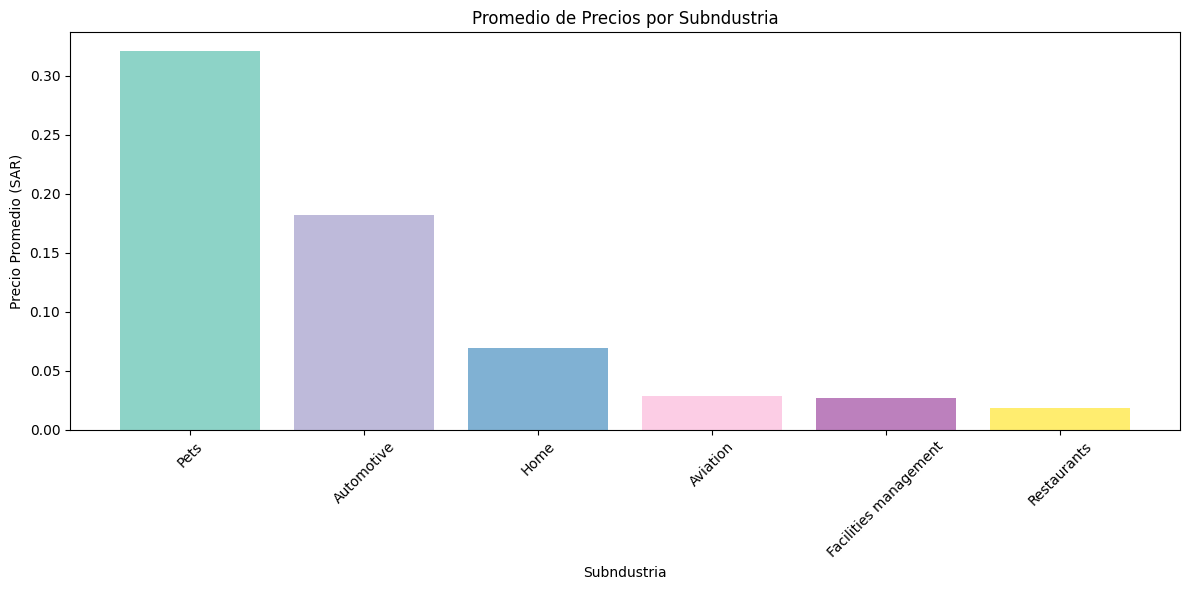

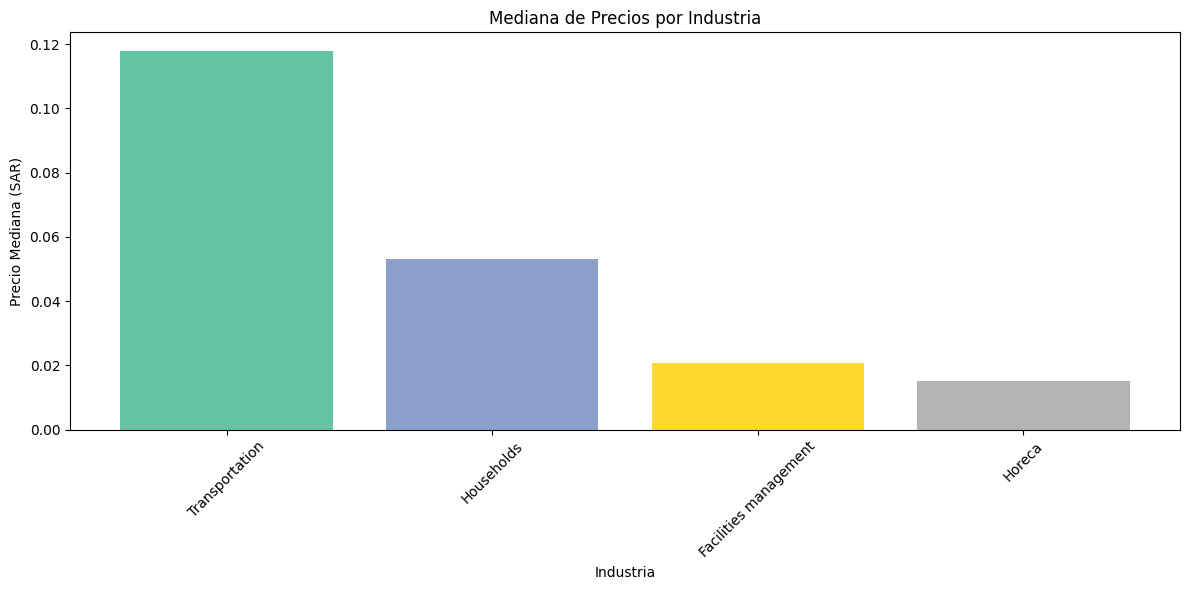

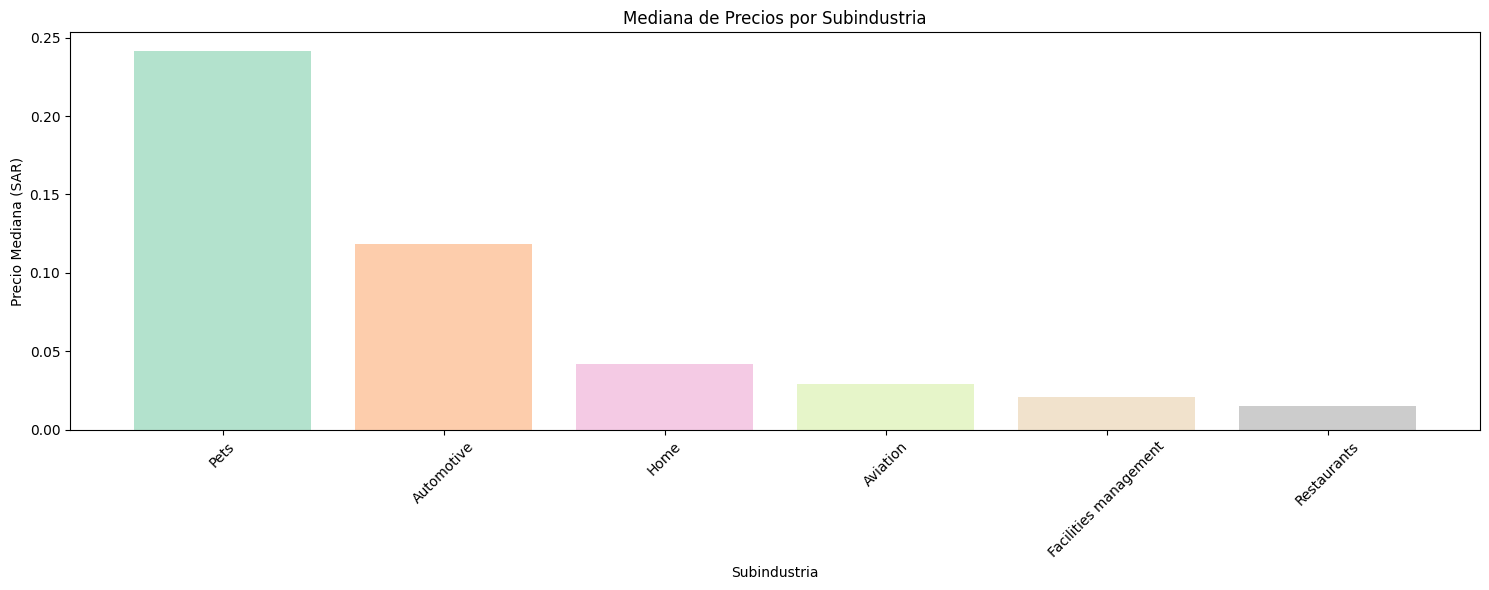

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Gráfico de promedios por industria (ordenado de mayor a menor)
plt.figure(figsize=(12, 6))
industrias_ordenadas = sorted(promedios_subindustria_dict.items(), key=lambda x: x[1], reverse=True)
industrias = [x[0] for x in industrias_ordenadas]
promedios = [x[1] for x in industrias_ordenadas]
colors = plt.cm.Set3(np.linspace(0, 1, len(industrias)))
plt.bar(industrias, promedios, color=colors)
plt.title('Promedio de Precios por Subndustria')
plt.xlabel('Subndustria')
plt.ylabel('Precio Promedio (SAR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Gráfico de medianas por industria (ordenado de mayor a menor)
plt.figure(figsize=(12, 6))
industrias_med_ordenadas = sorted(medianas_industria_dict.items(), key=lambda x: x[1], reverse=True)
industrias_med = [x[0] for x in industrias_med_ordenadas]
medianas_ind = [x[1] for x in industrias_med_ordenadas]
colors = plt.cm.Set2(np.linspace(0, 1, len(industrias_med)))
plt.bar(industrias_med, medianas_ind, color=colors)
plt.title('Mediana de Precios por Industria')
plt.xlabel('Industria')
plt.ylabel('Precio Mediana (SAR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de medianas por subindustria (ordenado de mayor a menor)
plt.figure(figsize=(15, 6))
subindustrias_med_ordenadas = sorted(medianas_subindustria_general_dict.items(), key=lambda x: x[1], reverse=True)
subindustrias_med = [x[0] for x in subindustrias_med_ordenadas]
medianas_sub = [x[1] for x in subindustrias_med_ordenadas]
colors = plt.cm.Pastel2(np.linspace(0, 1, len(subindustrias_med)))
plt.bar(subindustrias_med, medianas_sub, color=colors)
plt.title('Mediana de Precios por Subindustria')
plt.xlabel('Subindustria')
plt.ylabel('Precio Mediana (SAR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

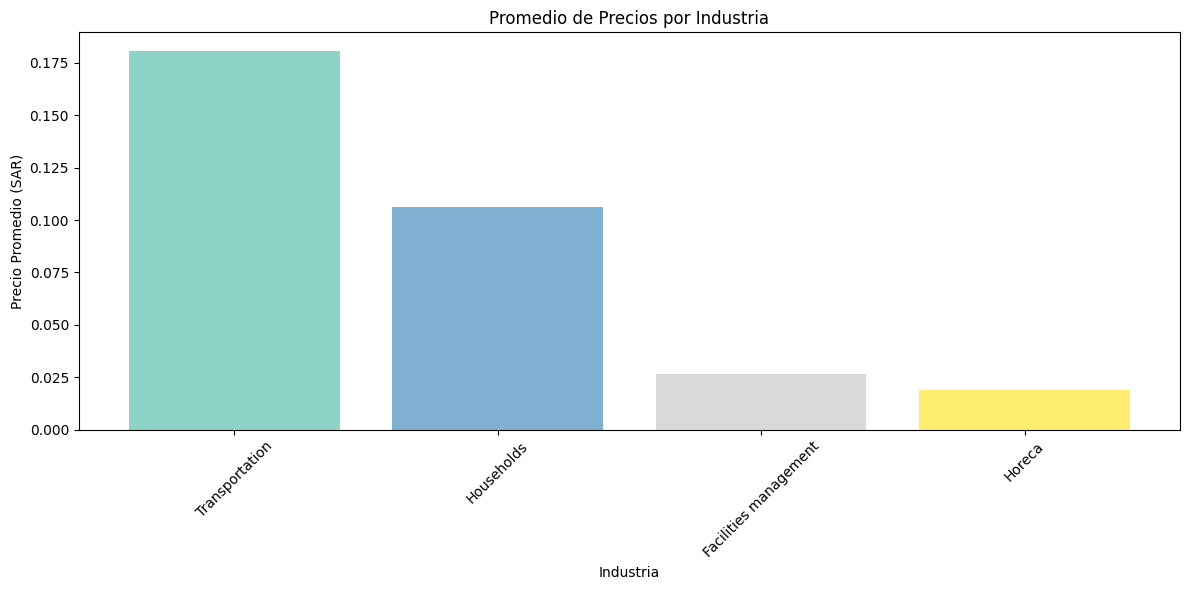

In [97]:
# Calcular promedio por industria del dataset de competencia
promedios_industria_competencia = competition_df.groupby('industry')['standard_price'].mean()

# Gráfico de promedios por industria de competencia (ordenado de mayor a menor)
plt.figure(figsize=(12, 6))
industrias_comp_ordenadas = sorted(promedios_industria_competencia.items(), key=lambda x: x[1], reverse=True)
industrias_comp = [x[0] for x in industrias_comp_ordenadas]
promedios_comp = [x[1] for x in industrias_comp_ordenadas]
colors = plt.cm.Set3(np.linspace(0, 1, len(industrias_comp)))
plt.bar(industrias_comp, promedios_comp, color=colors)
plt.title('Promedio de Precios por Industria')
plt.xlabel('Industria')
plt.ylabel('Precio Promedio (SAR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [98]:

# tipos_producto = wayakit_df['type_of_product'].unique()
# print("Tipos de producto disponibles:")
# for i, tipo in enumerate(tipos_producto, 1):
#     print(f"{i}. {tipo}")

# tipo_idx = int(input("Selecciona el número del tipo de producto: ")) - 1
# tipo_seleccionado = tipos_producto[tipo_idx]


# presentaciones = wayakit_df[wayakit_df['type_of_product'] == tipo_seleccionado]

# print("\nPresentaciones disponibles para ese tipo de producto:")
# for i, row in presentaciones.iterrows():
#     print(f"{i+1}. Volumen: {row['volume_liters']} L | Unidades: {row['pack_quantity_units']} | Subindustria: {row['subindustry']} | Industria: {row['industry']}")


# pres_idx = int(input("Selecciona el número de la presentación: ")) - 1
# presentacion_seleccionada = presentaciones.iloc[pres_idx]

# producto_wayakit = presentacion_seleccionada.to_dict()

# print("\nProducto seleccionado para predicción:")
# for k, v in producto_wayakit.items():
#     print(f"{k}: {v}")

In [99]:
# Verificar si el capping se aplicó correctamente
print("=== VERIFICACIÓN DE OUTLIERS ===")
print("Estadísticas de standard_price en competition_df:")
print(competition_df['standard_price'].describe())

print("\nValores más altos:")
print(competition_df.nlargest(10, 'standard_price')[['type_of_product', 'sub_industry', 'standard_price']])

print("\nValores más bajos:")
print(competition_df.nsmallest(10, 'standard_price')[['type_of_product', 'sub_industry', 'standard_price']])

# Verificar por subindustria
print("\n=== OUTLIERS POR SUBINDUSTRIA ===")
for sub in competition_df['sub_industry'].unique():
    subset = competition_df[competition_df['sub_industry'] == sub]
    Q1 = subset['standard_price'].quantile(0.25)
    Q3 = subset['standard_price'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = subset[(subset['standard_price'] < Q1 - 1.5*IQR) | (subset['standard_price'] > Q3 + 1.5*IQR)]
    if len(outliers) > 0:
        print(f"{sub}: {len(outliers)} outliers de {len(subset)} productos")

=== VERIFICACIÓN DE OUTLIERS ===
Estadísticas de standard_price en competition_df:
count    1825.000000
mean        0.116492
std         0.153326
min         0.000222
25%         0.022167
50%         0.063235
75%         0.140845
max         1.185000
Name: standard_price, dtype: float64

Valores más altos:
                    type_of_product sub_industry  standard_price
1747    P6-Cage and habitat cleaner         Pets        1.185000
1713    P4-Flea and tick home spray         Pets        1.150000
1672      P3-Pet urine odor remover         Pets        1.095678
1634  P1-Deodorizing wipes for pets         Pets        1.074800
1721    P4-Flea and tick home spray         Pets        1.047000
1729   P5-Antiseptic spray for pets         Pets        0.999833
1738       P5-Pet-safe wound washes         Pets        0.898551
1716    P4-Flea and tick home spray         Pets        0.898200
1734   P5-Antiseptic spray for pets         Pets        0.886667
1642  P1-Waterless shampoo for pets       

In [100]:
import pandas as pd
import numpy as np

def _manejar_caso_1_final(producto_wayakit, volumen_ml, competition_df):
    MIN_SAMPLES_PARA_MEDIANA = 3

    df_comp = competition_df.copy()

    def map_channel(channel):
        if channel == 'B2B': return 'B2B'
        if channel in ['E-commerce', 'Retail']: return 'B2C'
        return None
    
    df_comp['canal_agrupado'] = df_comp['channel'].apply(map_channel)

    # FILTRO INICIAL (Corregido)
    df_comp_filtrado = df_comp[
        (df_comp['type_of_product'] == producto_wayakit['type_of_product']) &
        # 👇 LA CORRECCIÓN ESTÁ AQUÍ
        (df_comp['sub_industry'] == producto_wayakit['subindustry']) &
        (df_comp['industry'] == producto_wayakit['industry'])
    ]

    if df_comp_filtrado.empty: return None

    def calcular_mediana_canal(df_canal):
        if len(df_canal) < MIN_SAMPLES_PARA_MEDIANA: return None
        df_canal = df_canal.copy()
        # Asumiendo que competition_df tiene 'total_quantity' después de la limpieza
        df_canal['peso_similitud'] = 1 / (np.log1p(abs(df_canal['total_quantity'] - volumen_ml)) + 1e-6)
        n_relevantes = max(MIN_SAMPLES_PARA_MEDIANA, int(len(df_canal) * 0.5))
        df_relevantes = df_canal.sort_values(by='peso_similitud', ascending=False).head(n_relevantes)
        # Asumiendo que competition_df tiene 'standard_price'
        return df_relevantes['standard_price'].median()

    mediana_b2b = calcular_mediana_canal(df_comp_filtrado[df_comp_filtrado['canal_agrupado'] == 'B2B'])
    mediana_b2c = calcular_mediana_canal(df_comp_filtrado[df_comp_filtrado['canal_agrupado'] == 'B2C'])

    if pd.notna(mediana_b2b):
        return {'mediana_b2b': mediana_b2b, 'mediana_b2c': mediana_b2c if pd.notna(mediana_b2c) else None}
    
    return None

In [ ]:
# #case 1 edited vesion
# import datetime
# import time

# def calcular_precio_minimo_viable(costo_produccion, volumen_ml):
#     """
#     Calcula el precio mínimo viable basado en costo + 30% ganancia
#     """
#     precio_minimo_por_ml = (costo_produccion / volumen_ml) * 1.30  # 30% de ganancia
#     return precio_minimo_por_ml * volumen_ml

# def validar_y_ajustar_precio(precio_predicho, costo_produccion, volumen_ml):
#     """
#     Valida el precio y lo ajusta si es necesario
#     """
    
#     if costo_produccion <= 0:
#         return precio_predicho, True, "Production cost is zero or negative"
    
#     precio_minimo_viable = calcular_precio_minimo_viable(costo_produccion, volumen_ml)
    
#     if precio_predicho < precio_minimo_viable:
#         ganancia_porcentual = 30.0  # Ya está calculado con 30%
#         return precio_minimo_viable, False, f"Low predicted price. Using minimum viable price with 30% profit margin."
    
#     # 3. Si el precio predicho es mayor al mínimo viable, verificar ganancia
#     ganancia_porcentual = ((precio_predicho - costo_produccion) / costo_produccion) * 100
    
#     if ganancia_porcentual >= 30:
#         return precio_predicho, True, f"Price viable with {ganancia_porcentual:.1f}% profit margin"
#     else:
#         # Ajustar el precio predicho para que tenga al menos 30%
#         porcentaje_faltante = 30 - ganancia_porcentual
#         factor_aumento = 1 + (porcentaje_faltante / 100)
#         precio_ajustado = precio_predicho * factor_aumento
#         return precio_ajustado, False, f"Adjusted price to reach 30% profit margin (was {ganancia_porcentual:.1f}%)"

# def predecir_precio(producto_wayakit, calculos_previos, competition_df):
#     start_time = time.time()

#     tipo_producto = producto_wayakit['type_of_product']
#     subindustria = producto_wayakit['subindustry']
#     industria = producto_wayakit['industry']
#     generic_type = producto_wayakit['generic_product_type']
#     costo_produccion = producto_wayakit['unit_cost_sar']

#     if producto_wayakit['volume_liters'] > 0:
#         volumen_ml = producto_wayakit['volume_liters'] * 1000
#     else:
#         volumen_ml = producto_wayakit['pack_quantity_units']

#     # CASO 1: Lógica dinámica y mejorada
#     resultado_caso1 = _manejar_caso_1_final(producto_wayakit, volumen_ml, competition_df)
    
#     if resultado_caso1:
#         mediana_b2b = resultado_caso1['mediana_b2b']
#         mediana_b2c = resultado_caso1['mediana_b2c']
        
#         precio_predicho = mediana_b2b * volumen_ml
#         precio_final, es_viable, mensaje_viabilidad = validar_y_ajustar_precio(precio_predicho, costo_produccion, volumen_ml)
        
#         mensaje_b2b = f"B2B Price (per ml): {mediana_b2b:.4f} SAR"
#         mensaje_b2c = f"B2C Price (per ml): {mediana_b2c:.4f} SAR" if mediana_b2c else "B2C Price: Not available"
#         mensaje = f"Direct competition found. {mensaje_b2b}, {mensaje_b2c}. {mensaje_viabilidad}"

#         prediccion = {
#                 # Datos del producto Wayakit
#                 'wayakit_product_id': producto_wayakit['product_id'],
#                 'wayakit_product_type': tipo_producto,
#                 'wayakit_generic_product_type': generic_type,
#                 'wayakit_subindustry': subindustria,
#                 'wayakit_industry': industria,
#                 'wayakit_volume_ml': volumen_ml,
#                 'wayakit_cost_sar': costo_produccion,
                
#                 # Datos de la competencia encontrados
#                 'competition_product_type_exists': True,
#                 'competition_generic_type_exists': True,
#                 'competition_subindustry_exists': False,
#                 'competition_industry_exists': True,
                
#                 # Valores de referencia usados
#                 'reference_median_caso1_b2b': mediana_b2b, # Guardamos la nueva referencia
#                 'reference_median_caso1_b2c': mediana_b2c,
#                 'reference_factor_subindustry': None,
#                 'reference_median_generic_b2b': None,
#                 'reference_median_generic_b2c': None,
#                 'reference_median_subindustry': None,
#                 'reference_median_industry': None,
                
#                 # Resultado de la predicción
#                 'case_executed': 1,
#                 'predicted_total_price_sar': precio_final,
#                 'predicted_price_per_ml': mediana_b2b, 
#                 'prediction_message': mensaje,
#                 'price_viable': es_viable,
#                 'profit_margin_percent': ((precio_final - costo_produccion) / costo_produccion) * 100 if costo_produccion > 0 else 0,
                
#                 # Metadatos
#                 'timestamp': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
#                 'execution_time_ms': round((time.time() - start_time) * 1000, 2)
#             }
#         return prediccion

#     # CASO 2: Tipo de Producto Existe, pero Subindustria Diferente
#     # Buscar si el tipo de producto existe en otras subindustrias
#     tipo_existe_en_competencia = any(tipo_producto == key[0] for key in calculos_previos['medianas_caso1'].keys())
    
#     if tipo_existe_en_competencia:
#         # Buscar la mediana del tipo de producto en otra subindustria disponible
#         medianas_tipo_producto = {}
#         for key, mediana in calculos_previos['medianas_caso1'].items():
#             if key[0] == tipo_producto:  # Mismo tipo de producto
#                 medianas_tipo_producto[key[1]] = mediana  # key[1] es la subindustria
        
#         if medianas_tipo_producto:
#             # Usar la primera subindustria disponible
#             subindustria_disponible = list(medianas_tipo_producto.keys())[0]
#             mediana_disponible = medianas_tipo_producto[subindustria_disponible]
            
#             # Buscar factor de ajuste entre subindustrias
#             factor_ajuste = calculos_previos['factores_subindustria'].get((subindustria_disponible, subindustria), 1.0)
            
#             # Calcular precio ajustado
#             precio_ajustado_por_ml = mediana_disponible * factor_ajuste
#             precio_predicho = precio_ajustado_por_ml * volumen_ml
            
#             # Validar y ajustar precio
#             precio_final, es_viable, mensaje_viabilidad = validar_y_ajustar_precio(precio_predicho, costo_produccion, volumen_ml)
            
#             # Calcular porcentaje de diferencia para el mensaje
#             if factor_ajuste > 1:
#                 porcentaje_diferencia = (factor_ajuste - 1) * 100
#                 mensaje_diferencia = f"products of {subindustria} are {porcentaje_diferencia:.1f}% more expensive than {subindustria_disponible}"
#             else:
#                 porcentaje_diferencia = (1 - factor_ajuste) * 100
#                 mensaje_diferencia = f"products of {subindustria} are {porcentaje_diferencia:.1f}% cheaper than {subindustria_disponible}"
            
#             mensaje = f"Estimated price based on subindustry difference - {mensaje_diferencia}. {mensaje_viabilidad}"
#             caso_ejecutado = 2
            
#             # Crear registro de predicción
#             prediccion = {
#                 # Datos del producto Wayakit
#                 'wayakit_product_id': producto_wayakit['product_id'],
#                 'wayakit_product_type': tipo_producto,
#                 'wayakit_generic_product_type': generic_type,
#                 'wayakit_subindustry': subindustria,
#                 'wayakit_industry': industria,
#                 'wayakit_volume_ml': volumen_ml,
#                 'wayakit_cost_sar': costo_produccion,
                
#                 # Datos de la competencia encontrados
#                 'competition_product_type_exists': True,
#                 'competition_generic_type_exists': True,
#                 'competition_subindustry_exists': False,
#                 'competition_industry_exists': True,
                
#                 # Valores de referencia usados
#                 'reference_median_caso1': mediana_disponible,
#                 'reference_factor_subindustry': factor_ajuste,
#                 'reference_median_generic_b2b': None,
#                 'reference_median_generic_b2c': None,
#                 'reference_median_subindustry': None,
#                 'reference_median_industry': None,
                
#                 # Resultado de la predicción
#                 'case_executed': caso_ejecutado,
#                 'predicted_total_price_sar': precio_final,
#                 'predicted_price_per_ml': precio_ajustado_por_ml,
#                 'prediction_message': mensaje,
#                 'price_viable': es_viable,
#                 'profit_margin_percent': ((precio_final - costo_produccion) / costo_produccion) * 100 if costo_produccion > 0 else 0,
                
#                 # Metadatos
#                 'timestamp': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
#                 'execution_time_ms': round((time.time() - start_time) * 1000, 2)
#             }
            
#             return prediccion
    
#     # NUEVO CASO 3: Mismo Generic Product Type + Industria
#     key_b2b_c3 = (generic_type, industria, 'B2B')
#     key_b2c_c3 = (generic_type, industria, 'B2C')
#     mediana_b2b = calculos_previos['medianas_generic_industry'].get(key_b2b_c3)
#     mediana_b2c = calculos_previos['medianas_generic_industry'].get(key_b2c_c3)
    
#     if mediana_b2b or mediana_b2c:
#         precios_canales = {}
#         mensajes_canales = []
#         if mediana_b2b:
#             precio_b2b = mediana_b2b * volumen_ml
#             precios_canales['B2B'] = precio_b2b
#             mensajes_canales.append(f"B2B: {mediana_b2b:.4f} SAR/ml = {precio_b2b:.2f} SAR")
#         if mediana_b2c:
#             precio_b2c = mediana_b2c * volumen_ml
#             precios_canales['B2C'] = precio_b2c
#             mensajes_canales.append(f"B2C: {mediana_b2c:.4f} SAR/ml = {precio_b2c:.2f} SAR")
        
#         if precios_canales:
#             canal_principal = 'B2B' if 'B2B' in precios_canales else 'B2C'
#             precio_predicho = precios_canales[canal_principal]
#             precio_final, es_viable, mensaje_viabilidad = validar_y_ajustar_precio(precio_predicho, costo_produccion, volumen_ml)
#             mensaje_canales_str = ", ".join(mensajes_canales)
#             mensaje = f"Price based on median generic type in same industry - {mensaje_canales_str}. {mensaje_viabilidad}"
#             prediccion = {
#                 'wayakit_product_id': producto_wayakit['product_id'],'wayakit_product_type': tipo_producto,'wayakit_generic_product_type': generic_type,'wayakit_subindustry': subindustria,'wayakit_industry': industria,'wayakit_volume_ml': volumen_ml,'wayakit_cost_sar': costo_produccion,'competition_product_type_exists': False,'competition_generic_type_exists': True,'competition_subindustry_exists': False, 'competition_industry_exists': True,'reference_median_caso1': None,'reference_factor_subindustry': None,'reference_median_generic_b2b': mediana_b2b,'reference_median_generic_b2c': mediana_b2c,'reference_median_subindustry': None,'reference_median_industry': None,'case_executed': 3,'predicted_total_price_sar': precio_final,'predicted_price_per_ml': mediana_b2b if mediana_b2b else mediana_b2c,'prediction_message': mensaje,'price_viable': es_viable,'profit_margin_percent': ((precio_final - costo_produccion) / costo_produccion) * 100 if costo_produccion > 0 else 0,'timestamp': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),'execution_time_ms': round((time.time() - start_time) * 1000, 2)
#             }
#             return prediccion
    
#     # NUEVO CASO 4: Mismo Generic Product Type (Lógica antigua del Caso 3)
#     key_b2b_c4 = (generic_type, 'B2B')
#     key_b2c_c4 = (generic_type, 'B2C')
#     mediana_b2b = calculos_previos['medianas_generic_type'].get(key_b2b_c4)
#     mediana_b2c = calculos_previos['medianas_generic_type'].get(key_b2c_c4)

#     if mediana_b2b or mediana_b2c:
#         precios_canales = {}
#         mensajes_canales = []
#         if mediana_b2b:
#             precio_b2b = mediana_b2b * volumen_ml
#             precios_canales['B2B'] = precio_b2b
#             mensajes_canales.append(f"B2B: {mediana_b2b:.4f} SAR/ml = {precio_b2b:.2f} SAR")
#         if mediana_b2c:
#             precio_b2c = mediana_b2c * volumen_ml
#             precios_canales['B2C'] = precio_b2c
#             mensajes_canales.append(f"B2C: {mediana_b2c:.4f} SAR/ml = {precio_b2c:.2f} SAR")
        
#         if precios_canales:
#             canal_principal = 'B2B' if 'B2B' in precios_canales else 'B2C'
#             precio_predicho = precios_canales[canal_principal]
#             precio_final, es_viable, mensaje_viabilidad = validar_y_ajustar_precio(precio_predicho, costo_produccion, volumen_ml)
#             mensaje_canales_str = ", ".join(mensajes_canales)
#             mensaje = f"Price based on median generic product type (any industry) - {mensaje_canales_str}. {mensaje_viabilidad}"
#             prediccion = {
#                 'wayakit_product_id': producto_wayakit['product_id'],'wayakit_product_type': tipo_producto,'wayakit_generic_product_type': generic_type,'wayakit_subindustry': subindustria,'wayakit_industry': industria,'wayakit_volume_ml': volumen_ml,'wayakit_cost_sar': costo_produccion,'competition_product_type_exists': False,'competition_generic_type_exists': True,'competition_subindustry_exists': False,'competition_industry_exists': False,'reference_median_caso1': None,'reference_factor_subindustry': None,'reference_median_generic_b2b': mediana_b2b,'reference_median_generic_b2c': mediana_b2c,'reference_median_subindustry': None,'reference_median_industry': None,'case_executed': 4,'predicted_total_price_sar': precio_final,'predicted_price_per_ml': mediana_b2b if mediana_b2b else mediana_b2c,'prediction_message': mensaje,'price_viable': es_viable,'profit_margin_percent': ((precio_final - costo_produccion) / costo_produccion) * 100 if costo_produccion > 0 else 0,'timestamp': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),'execution_time_ms': round((time.time() - start_time) * 1000, 2)
#             }
#             return prediccion
    
#     # CASO 5: Tipo de producto no existe, generic product type no existe, pero existe subindustria
#     # Verificar si existe la subindustria en la competencia
#     if subindustria in calculos_previos['medianas_subindustria_general']:
#         mediana_subindustria = calculos_previos['medianas_subindustria_general'][subindustria]
#         precio_predicho = mediana_subindustria * volumen_ml
        
#         # Validar y ajustar precio
#         precio_final, es_viable, mensaje_viabilidad = validar_y_ajustar_precio(precio_predicho, costo_produccion, volumen_ml)
        
#         mensaje = f"No product type. The median of {subindustria} is {mediana_subindustria:.4f} SAR/ml and the recommended price per ml is {mediana_subindustria:.4f} SAR/ml. {mensaje_viabilidad}"
#         caso_ejecutado = 4
        
#         # Crear registro de predicción
#         prediccion = {
#             # Datos del producto Wayakit
#             'wayakit_product_id': producto_wayakit['product_id'],
#             'wayakit_product_type': tipo_producto,
#             'wayakit_generic_product_type': generic_type,
#             'wayakit_subindustry': subindustria,
#             'wayakit_industry': industria,
#             'wayakit_volume_ml': volumen_ml,
#             'wayakit_cost_sar': costo_produccion,
            
#             # Datos de la competencia encontrados
#             'competition_product_type_exists': False,
#             'competition_generic_type_exists': False,
#             'competition_subindustry_exists': True,
#             'competition_industry_exists': True,
            
#             # Valores de referencia usados
#             'reference_median_caso1': None,
#             'reference_factor_subindustria': None,
#             'reference_median_generic_b2b': None,
#             'reference_median_generic_b2c': None,
#             'reference_median_subindustry': mediana_subindustria,
#             'reference_median_industry': None,
            
#             # Resultado de la predicción
#             'case_executed': caso_ejecutado,
#             'predicted_total_price_sar': precio_final,
#             'predicted_price_per_ml': mediana_subindustria,
#             'prediction_message': mensaje,
#             'price_viable': es_viable,
#             'profit_margin_percent': ((precio_final - costo_produccion) / costo_produccion) * 100 if costo_produccion > 0 else 0,
            
#             # Metadatos
#             'timestamp': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
#             'execution_time_ms': round((time.time() - start_time) * 1000, 2)
#         }
        
#         return prediccion
    
#     # CASO 6: Tipo de producto no existe, generic product type no existe, subindustria no existe, pero existe industria
#     # Verificar si existe la industria en la competencia
#     if industria in calculos_previos['medianas_industria']:
#         mediana_industria = calculos_previos['medianas_industria'][industria]
#         precio_predicho = mediana_industria * volumen_ml
        
#         # Validar y ajustar precio
#         precio_final, es_viable, mensaje_viabilidad = validar_y_ajustar_precio(precio_predicho, costo_produccion, volumen_ml)
        
#         mensaje = f"No product type. The median of {industria} is {mediana_industria:.4f} SAR/ml and the recommended price per ml is {mediana_industria:.4f} SAR/ml. {mensaje_viabilidad}"
#         caso_ejecutado = 5
        
#         # Crear registro de predicción
#         prediccion = {
#             # Datos del producto Wayakit
#             'wayakit_product_id': producto_wayakit['product_id'],
#             'wayakit_product_type': tipo_producto,
#             'wayakit_generic_product_type': generic_type,
#             'wayakit_subindustry': subindustria,
#             'wayakit_industry': industria,
#             'wayakit_volume_ml': volumen_ml,
#             'wayakit_cost_sar': costo_produccion,
            
#             # Datos de la competencia encontrados
#             'competition_product_type_exists': False,
#             'competition_generic_type_exists': False,
#             'competition_subindustry_exists': False,
#             'competition_industry_exists': True,
            
#             # Valores de referencia usados
#             'reference_median_caso1': None,
#             'reference_factor_subindustria': None,
#             'reference_median_generic_b2b': None,
#             'reference_median_generic_b2c': None,
#             'reference_median_subindustry': None,
#             'reference_median_industry': mediana_industria,
            
#             # Resultado de la predicción
#             'case_executed': caso_ejecutado,
#             'predicted_total_price_sar': precio_final,
#             'predicted_price_per_ml': mediana_industria,
#             'prediction_message': mensaje,
#             'price_viable': es_viable,
#             'profit_margin_percent': ((precio_final - costo_produccion) / costo_produccion) * 100 if costo_produccion > 0 else 0,
            
#             # Metadatos
#             'timestamp': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
#             'execution_time_ms': round((time.time() - start_time) * 1000, 2)
#         }
        
#         return prediccion
    
#     # CASO 7: Información Insuficiente - Sin Predicción
#     # Crear lista de industrias con precios promedio como referencia
#     industrias_referencia = []
#     for ind, precio in calculos_previos['medianas_industria'].items():
#         industrias_referencia.append(f"{ind}: {precio:.4f} SAR/ml")
    
#     mensaje_referencia = ", ".join(industrias_referencia)
#     mensaje = f"No price prediction - insufficient information. Reference points from other industries: {mensaje_referencia}"
#     caso_ejecutado = 6
    
#     # Crear registro de predicción
#     prediccion = {
#         # Datos del producto Wayakit
#         'wayakit_product_id': producto_wayakit['product_id'],
#         'wayakit_product_type': tipo_producto,
#         'wayakit_generic_product_type': generic_type,
#         'wayakit_subindustry': subindustria,
#         'wayakit_industry': industria,
#         'wayakit_volume_ml': volumen_ml,
#         'wayakit_cost_sar': costo_produccion,
        
#         # Datos de la competencia encontrados
#         'competition_product_type_exists': False,
#         'competition_generic_type_exists': False,
#         'competition_subindustry_exists': False,
#         'competition_industry_exists': False,
        
#         # Valores de referencia usados
#         'reference_median_caso1': None,
#         'reference_factor_subindustry': None,
#         'reference_median_generic_b2b': None,
#         'reference_median_generic_b2c': None,
#         'reference_median_subindustry': None,
#         'reference_median_industry': None,
        
#         # Resultado de la predicción
#         'case_executed': caso_ejecutado,
#         'predicted_total_price_sar': None,
#         'predicted_price_per_ml': None,
#         'prediction_message': mensaje,
#         'price_viable': False,
#         'profit_margin_percent': None,
        
#         # Metadatos
#         'timestamp': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
#         'execution_time_ms': round((time.time() - start_time) * 1000, 2)
#     }
    
#     return prediccion

# # Loop para predecir precios de todos los productos
# predicciones = []

# for idx, row in wayakit_df.iterrows():
#     producto_wayakit = row.to_dict()
    
#     resultado = predecir_precio(producto_wayakit, calculos_previos, competition_df)
    
#     if resultado:
#         predicciones.append(resultado)
#         if resultado['case_executed'] == 6:
#             print(f"✗ Product {idx+1}/{len(wayakit_df)}: {producto_wayakit['type_of_product']} - CASE {resultado['case_executed']} - No prediction")
#         else:
#             viabilidad = "✓" if resultado['price_viable'] else "⚠"
#             print(f"{viabilidad} Product {idx+1}/{len(wayakit_df)}: {producto_wayakit['type_of_product']} - CASE {resultado['case_executed']} - Profit margin: {resultado['profit_margin_percent']:.1f}%")
#     else:
#         print(f"✗ Product {idx+1}/{len(wayakit_df)}: {producto_wayakit['type_of_product']} - No prediction (error)")

# # Convertir a DataFrame y guardar
# if predicciones:
#     predicciones_df = pd.DataFrame(predicciones)
#     predicciones_df.to_excel('predictions_dataset_cases_edited.xlsx', index=False, engine='openpyxl')
#     print(f"\nPredictions dataset saved with {len(predicciones)} records")
#     print(f"Products with CASE 1: {len(predicciones_df[predicciones_df['case_executed'] == 1])}")
#     print(f"Products with CASE 2: {len(predicciones_df[predicciones_df['case_executed'] == 2])}")
#     print(f"Products with CASE 3: {len(predicciones_df[predicciones_df['case_executed'] == 3])}")
#     print(f"Products with CASE 4: {len(predicciones_df[predicciones_df['case_executed'] == 4])}")
#     print(f"Products with CASE 5: {len(predicciones_df[predicciones_df['case_executed'] == 5])}")
#     print(f"Products with CASE 6: {len(predicciones_df[predicciones_df['case_executed'] == 6])}")
#     print(f"Viable prices: {len(predicciones_df[predicciones_df['price_viable'] == True])}")
#     print(f"Adjusted prices: {len(predicciones_df[predicciones_df['price_viable'] == False])}")
#     print(f"No prediction: {len(predicciones_df[predicciones_df['case_executed'] == 6])}")
# else:
#     print("\nNo predictions generated")

✓ Product 1/2137: I1-General purpose cleaner - CASE 3 - Profit margin: 63.5%
✓ Product 2/2137: I1-General purpose cleaner - CASE 3 - Profit margin: 186.0%
✓ Product 3/2137: I1-General purpose cleaner - CASE 3 - Profit margin: 436.0%
✓ Product 4/2137: I1-General purpose cleaner - CASE 3 - Profit margin: 63.5%
✓ Product 5/2137: I1-Wood furniture cleaner - CASE 3 - Profit margin: 110.5%
✓ Product 6/2137: I1-Wood furniture cleaner - CASE 3 - Profit margin: 154.6%
✓ Product 7/2137: I1-Wood furniture cleaner - CASE 3 - Profit margin: 192.7%
✓ Product 8/2137: I1-Wood furniture cleaner - CASE 3 - Profit margin: 110.5%
⚠ Product 9/2137: I2-General hard floor cleaner - CASE 3 - Profit margin: 30.0%
⚠ Product 10/2137: I2-General hard floor cleaner - CASE 3 - Profit margin: 30.0%
⚠ Product 11/2137: I2-General hard floor cleaner - CASE 3 - Profit margin: 30.0%
⚠ Product 12/2137: I2-General hard floor cleaner - CASE 3 - Profit margin: 30.0%
✓ Product 13/2137: I2-Hard floor polish - CASE 4 - Profit m

In [33]:
#official version
import datetime
import time

def calcular_precio_minimo_viable(costo_produccion, volumen_ml):
    """
    Calcula el precio mínimo viable basado en costo + 30% ganancia
    """
    precio_minimo_por_ml = (costo_produccion / volumen_ml) * 1.30  # 30% de ganancia
    return precio_minimo_por_ml * volumen_ml

def validar_y_ajustar_precio(precio_predicho, costo_produccion, volumen_ml):
    """
    Valida el precio y lo ajusta si es necesario
    """
    
    if costo_produccion <= 0:
        return precio_predicho, True, "Production cost is zero or negative"
    
    precio_minimo_viable = calcular_precio_minimo_viable(costo_produccion, volumen_ml)
    
    if precio_predicho < precio_minimo_viable:
        ganancia_porcentual = 30.0  # Ya está calculado con 30%
        return precio_minimo_viable, False, f"Low predicted price. Using minimum viable price with 30% profit margin."
    
    # 3. Si el precio predicho es mayor al mínimo viable, verificar ganancia
    ganancia_porcentual = ((precio_predicho - costo_produccion) / costo_produccion) * 100
    
    if ganancia_porcentual >= 30:
        return precio_predicho, True, f"Price viable with {ganancia_porcentual:.1f}% profit margin"
    else:
        # Ajustar el precio predicho para que tenga al menos 30%
        porcentaje_faltante = 30 - ganancia_porcentual
        factor_aumento = 1 + (porcentaje_faltante / 100)
        precio_ajustado = precio_predicho * factor_aumento
        return precio_ajustado, False, f"Adjusted price to reach 30% profit margin (was {ganancia_porcentual:.1f}%)"

def predecir_precio(producto_wayakit, calculos_previos, competition_df):
    """
    Función principal del árbol de decisión para predecir precios
    """
    start_time = time.time()

    tipo_producto = producto_wayakit['type_of_product']
    subindustria = producto_wayakit['subindustry']
    industria = producto_wayakit['industry']
    generic_type = producto_wayakit['generic_product_type']
    costo_produccion = producto_wayakit['unit_cost_sar']

    if producto_wayakit['volume_liters'] > 0:
        volumen_ml = producto_wayakit['volume_liters'] * 1000  
    else:
        volumen_ml = producto_wayakit['pack_quantity_units'] 
    
    # CASO 1: Información Completa - Competencia Directa
    key_caso1 = (tipo_producto, subindustria, industria)
    if key_caso1 in calculos_previos['medianas_caso1']:
        mediana_caso1 = calculos_previos['medianas_caso1'][key_caso1]
        precio_predicho = mediana_caso1 * volumen_ml
        
        # Validar y ajustar precio
        precio_final, es_viable, mensaje_viabilidad = validar_y_ajustar_precio(precio_predicho, costo_produccion, volumen_ml)
        
        mensaje = f"Price based on direct competition - {mensaje_viabilidad}"
        caso_ejecutado = 1
        
        # Crear registro de predicción
        prediccion = {
            # Datos del producto Wayakit
            'wayakit_product_id': producto_wayakit['product_id'],
            'wayakit_product_type': tipo_producto,
            'wayakit_generic_product_type': generic_type,
            'wayakit_subindustry': subindustria,
            'wayakit_industry': industria,
            'wayakit_volume_ml': volumen_ml,
            'wayakit_cost_sar': costo_produccion,
            
            # Datos de la competencia encontrados
            'competition_product_type_exists': True,
            'competition_generic_type_exists': True,
            'competition_subindustry_exists': True,
            'competition_industry_exists': True,
            
            # Valores de referencia usados
            'reference_median_caso1': mediana_caso1,
            'reference_factor_subindustry': None,
            'reference_median_generic_b2b': None,
            'reference_median_generic_b2c': None,
            'reference_median_subindustry': None,
            'reference_median_industry': None,
            
            # Resultado de la predicción
            'case_executed': caso_ejecutado,
            'predicted_total_price_sar': precio_final,
            'predicted_price_per_ml': mediana_caso1,
            'prediction_message': mensaje,
            'price_viable': es_viable,
            'profit_margin_percent': ((precio_final - costo_produccion) / costo_produccion) * 100 if costo_produccion > 0 else 0,
            
            # Metadatos
            'timestamp': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'execution_time_ms': round((time.time() - start_time) * 1000, 2)
        }
        
        return prediccion
    
    # CASO 2: Tipo de Producto Existe, pero Subindustria Diferente
    # Buscar si el tipo de producto existe en otras subindustrias
    tipo_existe_en_competencia = any(tipo_producto == key[0] for key in calculos_previos['medianas_caso1'].keys())
    
    if tipo_existe_en_competencia:
        # Buscar la mediana del tipo de producto en otra subindustria disponible
        medianas_tipo_producto = {}
        for key, mediana in calculos_previos['medianas_caso1'].items():
            if key[0] == tipo_producto:  # Mismo tipo de producto
                medianas_tipo_producto[key[1]] = mediana  # key[1] es la subindustria
        
        if medianas_tipo_producto:
            # Usar la primera subindustria disponible
            subindustria_disponible = list(medianas_tipo_producto.keys())[0]
            mediana_disponible = medianas_tipo_producto[subindustria_disponible]
            
            # Buscar factor de ajuste entre subindustrias
            factor_ajuste = calculos_previos['factores_subindustria'].get((subindustria_disponible, subindustria), 1.0)
            
            # Calcular precio ajustado
            precio_ajustado_por_ml = mediana_disponible * factor_ajuste
            precio_predicho = precio_ajustado_por_ml * volumen_ml
            
            # Validar y ajustar precio
            precio_final, es_viable, mensaje_viabilidad = validar_y_ajustar_precio(precio_predicho, costo_produccion, volumen_ml)
            
            # Calcular porcentaje de diferencia para el mensaje
            if factor_ajuste > 1:
                porcentaje_diferencia = (factor_ajuste - 1) * 100
                mensaje_diferencia = f"products of {subindustria} are {porcentaje_diferencia:.1f}% more expensive than {subindustria_disponible}"
            else:
                porcentaje_diferencia = (1 - factor_ajuste) * 100
                mensaje_diferencia = f"products of {subindustria} are {porcentaje_diferencia:.1f}% cheaper than {subindustria_disponible}"
            
            mensaje = f"Estimated price based on subindustry difference - {mensaje_diferencia}. {mensaje_viabilidad}"
            caso_ejecutado = 2
            
            # Crear registro de predicción
            prediccion = {
                # Datos del producto Wayakit
                'wayakit_product_id': producto_wayakit['product_id'],
                'wayakit_product_type': tipo_producto,
                'wayakit_generic_product_type': generic_type,
                'wayakit_subindustry': subindustria,
                'wayakit_industry': industria,
                'wayakit_volume_ml': volumen_ml,
                'wayakit_cost_sar': costo_produccion,
                
                # Datos de la competencia encontrados
                'competition_product_type_exists': True,
                'competition_generic_type_exists': True,
                'competition_subindustry_exists': False,
                'competition_industry_exists': True,
                
                # Valores de referencia usados
                'reference_median_caso1': mediana_disponible,
                'reference_factor_subindustry': factor_ajuste,
                'reference_median_generic_b2b': None,
                'reference_median_generic_b2c': None,
                'reference_median_subindustry': None,
                'reference_median_industry': None,
                
                # Resultado de la predicción
                'case_executed': caso_ejecutado,
                'predicted_total_price_sar': precio_final,
                'predicted_price_per_ml': precio_ajustado_por_ml,
                'prediction_message': mensaje,
                'price_viable': es_viable,
                'profit_margin_percent': ((precio_final - costo_produccion) / costo_produccion) * 100 if costo_produccion > 0 else 0,
                
                # Metadatos
                'timestamp': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                'execution_time_ms': round((time.time() - start_time) * 1000, 2)
            }
            
            return prediccion
    
    # CASO 3: Mismo Generic Product Type, Diferente Tipo de Producto
    # Verificar si existe el mismo generic product type en competencia
    generic_type_existe = False
    mediana_b2b = None
    mediana_b2c = None
    
    # Buscar medianas por canal (B2B y B2C) para el generic product type
    for key, mediana in calculos_previos['medianas_generic_type'].items():
        if key[0] == generic_type:
            generic_type_existe = True
            if key[1] == 'B2B':
                mediana_b2b = mediana
            elif key[1] == 'B2C':
                mediana_b2c = mediana
    
    if generic_type_existe:
        # Calcular precios para ambos canales si existen
        precios_canales = {}
        mensajes_canales = []
        
        if mediana_b2b:
            precio_b2b = mediana_b2b * volumen_ml
            precios_canales['B2B'] = precio_b2b
            mensajes_canales.append(f"B2B: {mediana_b2b:.4f} SAR/ml = {precio_b2b:.2f} SAR")
        
        if mediana_b2c:
            precio_b2c = mediana_b2c * volumen_ml
            precios_canales['B2C'] = precio_b2c
            mensajes_canales.append(f"B2C: {mediana_b2c:.4f} SAR/ml = {precio_b2c:.2f} SAR")
        
        if precios_canales:
            # Usar el primer canal disponible como precio principal
            canal_principal = list(precios_canales.keys())[0]
            precio_predicho = precios_canales[canal_principal]
            
            # Validar y ajustar precio
            precio_final, es_viable, mensaje_viabilidad = validar_y_ajustar_precio(precio_predicho, costo_produccion, volumen_ml)
            
            # Crear mensaje con todos los canales disponibles
            mensaje_canales = ", ".join(mensajes_canales)
            mensaje = f"Price based on median generic product type - {mensaje_canales}. {mensaje_viabilidad}"
            caso_ejecutado = 3
            
            # Crear registro de predicción
            prediccion = {
                # Datos del producto Wayakit
                'wayakit_product_id': producto_wayakit['product_id'],
                'wayakit_product_type': tipo_producto,
                'wayakit_generic_product_type': generic_type,
                'wayakit_subindustry': subindustria,
                'wayakit_industry': industria,
                'wayakit_volume_ml': volumen_ml,
                'wayakit_cost_sar': costo_produccion,
                
                # Datos de la competencia encontrados
                'competition_product_type_exists': False,
                'competition_generic_type_exists': True,
                'competition_subindustry_exists': False,
                'competition_industry_exists': False,
                
                # Valores de referencia usados
                'reference_median_caso1': None,
                'reference_factor_subindustry': None,
                'reference_median_generic_b2b': mediana_b2b,
                'reference_median_generic_b2c': mediana_b2c,
                'reference_median_subindustry': None,
                'reference_median_industry': None,
                
                # Resultado de la predicción
                'case_executed': caso_ejecutado,
                'predicted_total_price_sar': precio_final,
                'predicted_price_per_ml': mediana_b2b if mediana_b2b else mediana_b2c,
                'prediction_message': mensaje,
                'price_viable': es_viable,
                'profit_margin_percent': ((precio_final - costo_produccion) / costo_produccion) * 100 if costo_produccion > 0 else 0,
                
                # Metadatos
                'timestamp': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                'execution_time_ms': round((time.time() - start_time) * 1000, 2)
            }
            
            return prediccion
    
    # CASO 4: Tipo de producto no existe, generic product type no existe, pero existe subindustria
    # Verificar si existe la subindustria en la competencia
    if subindustria in calculos_previos['medianas_subindustria_general']:
        mediana_subindustria = calculos_previos['medianas_subindustria_general'][subindustria]
        precio_predicho = mediana_subindustria * volumen_ml
        
        # Validar y ajustar precio
        precio_final, es_viable, mensaje_viabilidad = validar_y_ajustar_precio(precio_predicho, costo_produccion, volumen_ml)
        
        mensaje = f"No product type. The median of {subindustria} is {mediana_subindustria:.4f} SAR/ml and the recommended price per ml is {mediana_subindustria:.4f} SAR/ml. {mensaje_viabilidad}"
        caso_ejecutado = 4
        
        # Crear registro de predicción
        prediccion = {
            # Datos del producto Wayakit
            'wayakit_product_id': producto_wayakit['product_id'],
            'wayakit_product_type': tipo_producto,
            'wayakit_generic_product_type': generic_type,
            'wayakit_subindustry': subindustria,
            'wayakit_industry': industria,
            'wayakit_volume_ml': volumen_ml,
            'wayakit_cost_sar': costo_produccion,
            
            # Datos de la competencia encontrados
            'competition_product_type_exists': False,
            'competition_generic_type_exists': False,
            'competition_subindustry_exists': True,
            'competition_industry_exists': True,
            
            # Valores de referencia usados
            'reference_median_caso1': None,
            'reference_factor_subindustria': None,
            'reference_median_generic_b2b': None,
            'reference_median_generic_b2c': None,
            'reference_median_subindustry': mediana_subindustria,
            'reference_median_industry': None,
            
            # Resultado de la predicción
            'case_executed': caso_ejecutado,
            'predicted_total_price_sar': precio_final,
            'predicted_price_per_ml': mediana_subindustria,
            'prediction_message': mensaje,
            'price_viable': es_viable,
            'profit_margin_percent': ((precio_final - costo_produccion) / costo_produccion) * 100 if costo_produccion > 0 else 0,
            
            # Metadatos
            'timestamp': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'execution_time_ms': round((time.time() - start_time) * 1000, 2)
        }
        
        return prediccion
    
    # CASO 5: Tipo de producto no existe, generic product type no existe, subindustria no existe, pero existe industria
    # Verificar si existe la industria en la competencia
    if industria in calculos_previos['medianas_industria']:
        mediana_industria = calculos_previos['medianas_industria'][industria]
        precio_predicho = mediana_industria * volumen_ml
        
        # Validar y ajustar precio
        precio_final, es_viable, mensaje_viabilidad = validar_y_ajustar_precio(precio_predicho, costo_produccion, volumen_ml)
        
        mensaje = f"No product type. The median of {industria} is {mediana_industria:.4f} SAR/ml and the recommended price per ml is {mediana_industria:.4f} SAR/ml. {mensaje_viabilidad}"
        caso_ejecutado = 5
        
        # Crear registro de predicción
        prediccion = {
            # Datos del producto Wayakit
            'wayakit_product_id': producto_wayakit['product_id'],
            'wayakit_product_type': tipo_producto,
            'wayakit_generic_product_type': generic_type,
            'wayakit_subindustry': subindustria,
            'wayakit_industry': industria,
            'wayakit_volume_ml': volumen_ml,
            'wayakit_cost_sar': costo_produccion,
            
            # Datos de la competencia encontrados
            'competition_product_type_exists': False,
            'competition_generic_type_exists': False,
            'competition_subindustry_exists': False,
            'competition_industry_exists': True,
            
            # Valores de referencia usados
            'reference_median_caso1': None,
            'reference_factor_subindustria': None,
            'reference_median_generic_b2b': None,
            'reference_median_generic_b2c': None,
            'reference_median_subindustry': None,
            'reference_median_industry': mediana_industria,
            
            # Resultado de la predicción
            'case_executed': caso_ejecutado,
            'predicted_total_price_sar': precio_final,
            'predicted_price_per_ml': mediana_industria,
            'prediction_message': mensaje,
            'price_viable': es_viable,
            'profit_margin_percent': ((precio_final - costo_produccion) / costo_produccion) * 100 if costo_produccion > 0 else 0,
            
            # Metadatos
            'timestamp': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'execution_time_ms': round((time.time() - start_time) * 1000, 2)
        }
        
        return prediccion
    
    # CASO 6: Información Insuficiente - Sin Predicción
    # Crear lista de industrias con precios promedio como referencia
    industrias_referencia = []
    for ind, precio in calculos_previos['medianas_industria'].items():
        industrias_referencia.append(f"{ind}: {precio:.4f} SAR/ml")
    
    mensaje_referencia = ", ".join(industrias_referencia)
    mensaje = f"No price prediction - insufficient information. Reference points from other industries: {mensaje_referencia}"
    caso_ejecutado = 6
    
    # Crear registro de predicción
    prediccion = {
        # Datos del producto Wayakit
        'wayakit_product_id': producto_wayakit['product_id'],
        'wayakit_product_type': tipo_producto,
        'wayakit_generic_product_type': generic_type,
        'wayakit_subindustry': subindustria,
        'wayakit_industry': industria,
        'wayakit_volume_ml': volumen_ml,
        'wayakit_cost_sar': costo_produccion,
        
        # Datos de la competencia encontrados
        'competition_product_type_exists': False,
        'competition_generic_type_exists': False,
        'competition_subindustry_exists': False,
        'competition_industry_exists': False,
        
        # Valores de referencia usados
        'reference_median_caso1': None,
        'reference_factor_subindustry': None,
        'reference_median_generic_b2b': None,
        'reference_median_generic_b2c': None,
        'reference_median_subindustry': None,
        'reference_median_industry': None,
        
        # Resultado de la predicción
        'case_executed': caso_ejecutado,
        'predicted_total_price_sar': None,
        'predicted_price_per_ml': None,
        'prediction_message': mensaje,
        'price_viable': False,
        'profit_margin_percent': None,
        
        # Metadatos
        'timestamp': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'execution_time_ms': round((time.time() - start_time) * 1000, 2)
    }
    
    return prediccion

# Loop para predecir precios de todos los productos
predicciones = []

for idx, row in wayakit_df.iterrows():
    producto_wayakit = row.to_dict()
    
    resultado = predecir_precio(producto_wayakit, calculos_previos, competition_df)
    
    if resultado:
        predicciones.append(resultado)
        if resultado['case_executed'] == 6:
            print(f"✗ Product {idx+1}/{len(wayakit_df)}: {producto_wayakit['type_of_product']} - CASE {resultado['case_executed']} - No prediction")
        else:
            viabilidad = "✓" if resultado['price_viable'] else "⚠"
            print(f"{viabilidad} Product {idx+1}/{len(wayakit_df)}: {producto_wayakit['type_of_product']} - CASE {resultado['case_executed']} - Profit margin: {resultado['profit_margin_percent']:.1f}%")
    else:
        print(f"✗ Product {idx+1}/{len(wayakit_df)}: {producto_wayakit['type_of_product']} - No prediction (error)")

# Convertir a DataFrame y guardar
if predicciones:
    predicciones_df = pd.DataFrame(predicciones)
    predicciones_df.to_excel('predictions_dataset_complete3.xlsx', index=False, engine='openpyxl')
    print(f"\nPredictions dataset saved with {len(predicciones)} records")
    print(f"Products with CASE 1: {len(predicciones_df[predicciones_df['case_executed'] == 1])}")
    print(f"Products with CASE 2: {len(predicciones_df[predicciones_df['case_executed'] == 2])}")
    print(f"Products with CASE 3: {len(predicciones_df[predicciones_df['case_executed'] == 3])}")
    print(f"Products with CASE 4: {len(predicciones_df[predicciones_df['case_executed'] == 4])}")
    print(f"Products with CASE 5: {len(predicciones_df[predicciones_df['case_executed'] == 5])}")
    print(f"Products with CASE 6: {len(predicciones_df[predicciones_df['case_executed'] == 6])}")
    print(f"Viable prices: {len(predicciones_df[predicciones_df['price_viable'] == True])}")
    print(f"Adjusted prices: {len(predicciones_df[predicciones_df['price_viable'] == False])}")
    print(f"No prediction: {len(predicciones_df[predicciones_df['case_executed'] == 6])}")
else:
    print("\nNo predictions generated")

✓ Product 1/2137: I1-General purpose cleaner - CASE 3 - Profit margin: 277.1%
✓ Product 2/2137: I1-General purpose cleaner - CASE 3 - Profit margin: 559.6%
✓ Product 3/2137: I1-General purpose cleaner - CASE 3 - Profit margin: 1136.4%
✓ Product 4/2137: I1-General purpose cleaner - CASE 3 - Profit margin: 277.1%
✓ Product 5/2137: I1-Wood furniture cleaner - CASE 3 - Profit margin: 110.5%
✓ Product 6/2137: I1-Wood furniture cleaner - CASE 3 - Profit margin: 154.6%
✓ Product 7/2137: I1-Wood furniture cleaner - CASE 3 - Profit margin: 192.7%
✓ Product 8/2137: I1-Wood furniture cleaner - CASE 3 - Profit margin: 110.5%
⚠ Product 9/2137: I2-General hard floor cleaner - CASE 3 - Profit margin: 30.0%
✓ Product 10/2137: I2-General hard floor cleaner - CASE 3 - Profit margin: 48.8%
✓ Product 11/2137: I2-General hard floor cleaner - CASE 3 - Profit margin: 71.1%
⚠ Product 12/2137: I2-General hard floor cleaner - CASE 3 - Profit margin: 30.0%
✓ Product 13/2137: I2-Hard floor polish - CASE 3 - Profi

In [69]:
import pandas as pd

# 1. Medianas Caso 1 (por tipo de producto, subindustria, industria)
df_medianas_caso1 = pd.DataFrame([
    {"type_of_product": k[0], "sub_industry": k[1], "industry": k[2], "median_price_per_ml": v}
    for k, v in calculos_previos['medianas_caso1'].items()
])

# 2. Promedios generales por subindustria
df_promedios_subindustria = pd.DataFrame([
    {"sub_industry": k, "mean_price_per_ml": v}
    for k, v in calculos_previos['promedios_subindustria'].items()
])

# 3. Factores de ajuste entre subindustrias
df_factores_subindustria = pd.DataFrame([
    {"subindustry_from": k[0], "subindustry_to": k[1], "factor": v}
    for k, v in calculos_previos['factores_subindustria'].items()
])

# 4. Medianas por generic product type y canal
df_medianas_generic_type = pd.DataFrame([
    {"generic_product_type": k[0], "channel": k[1], "median_price_per_ml": v}
    for k, v in calculos_previos['medianas_generic_type'].items()
])

# 5. Medianas generales por subindustria
df_medianas_subindustria_general = pd.DataFrame([
    {"sub_industry": k, "median_price_per_ml": v}
    for k, v in calculos_previos['medianas_subindustria_general'].items()
])

# 6. Medianas generales por industria
df_medianas_industria = pd.DataFrame([
    {"industry": k, "median_price_per_ml": v}
    for k, v in calculos_previos['medianas_industria'].items()
])

# Guardar todas las tablas en un solo archivo Excel, cada una en una hoja
with pd.ExcelWriter('calculos_previos_wayakit.xlsx', engine='openpyxl') as writer:
    df_medianas_caso1.to_excel(writer, sheet_name='Medianas_Caso1', index=False)
    df_promedios_subindustria.to_excel(writer, sheet_name='Promedios_Subindustria', index=False)
    df_factores_subindustria.to_excel(writer, sheet_name='Factores_Subindustria', index=False)
    df_medianas_generic_type.to_excel(writer, sheet_name='Medianas_GenericType', index=False)
    df_medianas_subindustria_general.to_excel(writer, sheet_name='Medianas_Subindustria', index=False)
    df_medianas_industria.to_excel(writer, sheet_name='Medianas_Industria', index=False)

print("¡Archivo 'calculos_previos_wayakit.xlsx' generado con todas las tablas!")

¡Archivo 'calculos_previos_wayakit.xlsx' generado con todas las tablas!


In [2]:
import pandas as pd

# Cargar los datos de cotizaciones
df_quotes = pd.read_csv('quotes_history.csv')

# Limpiar nombres de columnas (pueden tener espacios)
df_quotes.columns = df_quotes.columns.str.strip()

# Filtrar las predicciones erróneas
wrong_predictions = df_quotes[df_quotes['Notes about prediction vs quoted'] == 'Wrong prediction']

# Imprimir las columnas relevantes para analizar los errores
print(wrong_predictions[[
    'WAYAKIT product code',
    'Generic product type',
    'Subindustry',
    'Prediction case',
    'Predicted model price per unit (SAR)',
    'Quoted price per unit (SAR)',
    'Percentage price difference (quoted/predicted)'
]])

# Guardar el DataFrame wrong_predictions en un archivo CSV
wrong_predictions.to_csv('wrong_predictions.csv', index=False)
print("Archivo 'wrong_predictions.csv' guardado correctamente.")

    WAYAKIT product code       Generic product type            Subindustry  \
1           FP-FMN-00401               Floor polish  Facilities management   
3           FP-FMN-00701              Stain remover  Facilities management   
4           FP-FMN-00801       Marble floor cleaner  Facilities management   
6           FP-FMN-01100         Cleaning wet wipes  Facilities management   
8           FP-FMN-01401              Air freshener  Facilities management   
..                   ...                        ...                    ...   
136         FP-FMN-02301    Stainless steel cleaner  Facilities management   
137         FP-HOT-04901  Leather and vinyl cleaner                 Hotels   
138         FP-SPA-01100   Disinfectant and cleaner        Spas and salons   
139         FP-HOT-04901  Leather and vinyl cleaner                 Hotels   
140         FP-SPA-01200         Cleaning wet wipes        Spas and salons   

    Prediction case Predicted model price per unit (SAR)  \
1  